Dataset from kaggle competition:
https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/data?select=train.csv.zip

# Firstly: my way

In [1]:
import pandas as pd
import datetime
import os
import category_encoders
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.5f}'.format)

In [4]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

print(df_train.shape[0])
df_train.info()

4209
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,...,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81000,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53000,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26000,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62000,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02000,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39000,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,...,0

In [6]:
target_col = 'y'
df_train.drop(['ID'], inplace=True, axis=1)

## Preprocessing

In [7]:
print('Train number of col with null:', len(df_train.isna().sum()[df_train.isna().sum() > 0]))

Train number of col with null: 0


In [8]:
object_cols = df_train.select_dtypes(include='object').columns
for col in object_cols:
    print(col)
    print(df_train[col].value_counts())
    print('____________________________________________________________________________\n')

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64
____________________________________________________________________________

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
____________________________________________________________________________

X2
as    1659
ae     496
ai     415
m      367
ak   

1) X_4 - 1 if x == d else 0 or just remove
2) X_0, X_1, X_2, X_5, X_6, X_8 - encoding with one column ('traget', 'leaveoneout', 'catboost')
3) X_3 - a few values, we can use OneHotEncoder
4) by the way, where is 'X_7' - ?

In [9]:
def X4_encoder_func(df):
    df['X4'] = df['X4'].apply(lambda x: 1 if x == 'd' else 0)
    return df

preproc_pipe = Pipeline(
    [
        ('X4_encoder', FunctionTransformer(X4_encoder_func)),
        ('X3_encoder', category_encoders.OneHotEncoder(cols=['X3'])),
        ('others_encoder', category_encoders.CatBoostEncoder(cols=['X0', 'X1', 'X2', 'X5', 'X6', 'X8'],
                                                             random_state=42))
    ]
)

In [10]:
preproc_pipe.fit(df_train, y=df_train[target_col])
df_train = preproc_pipe.transform(df_train)
df_test = preproc_pipe.transform(df_test)

df_train

,y,X0,X1,X2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X3_7,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,...,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81000,99.58994,101.41076,103.71133,1,0,0,0,0,0,0,0,100.66932,101.16477,97.76475,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,88.53000,99.58994,93.94029,96.54186,0,1,0,0,0,0,0,0,100.66932,98.94910,97.76475,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,76.26000,78.15420,95.85735,83.49528,0,0,1,0,0,0,0,0,85.84977,101.16477,98.59697,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,80.62000,78.15420,93.94029,83.49528,0,0,0,1,0,0,0,0,85.84977,98.94910,104.95725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,78.02000,78.15420,101.41076,83.49528,0,0,0,1,0,0,0,0,100.66932,101.34538,102.18794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42

## feature selection for lgbmregressor

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(target_col, axis=1), df_train[target_col],
    test_size=0.1, random_state=43,
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2, random_state=43
)

In [12]:
print("Train target: ", y_train.mean())
print("Val target: ", y_val.mean())
print("Test target: ", y_test.mean())

Train target:  100.83484488448843
Val target:  100.29687335092348
Test target:  100.14857482185273


In [13]:
hp_with_optuna = {
        "max_evals": 200,
        "common_params": {
            "n_estimators": 500,
            "boosting_type": "gbdt",
            "n_jobs": 8,
            "verbose": -1,
            "early_stopping_round": 10,
            "extra_trees": False,
            "random_state": 42,
            "importance_type": "gain"
            },
        "param_space": {
            "suggest_float": {
                "learning_rate": [0.01, 1],
                "min_child_weight": [0.01, 1],
                "reg_alpha": [1, 20],
                "reg_lambda": [1, 50],
                "min_split_gain": [0.0, 0.9],
                "path_smooth": [0.0, 0.9]
            },
            "suggest_int": {
                "max_bin": [10, 400],
                "max_depth": [3, 6],
                "num_leaves": [8, 128]
            }
        },
        "f_opt": mean_absolute_error
}

In [14]:
# searching for optimal hyperparameters set
falling_result = feature_selector.falling_detection(X_train, y_train, X_val, y_val, **hp_with_optuna,
                                                    importance_treshold=0)

  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

falling was suspected!
numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

suspection was failed.
numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

falling was suspected!
numbers of removed features:  1


  0%|          | 0/200 [00:00<?, ?it/s]

numbers of removed features:  1


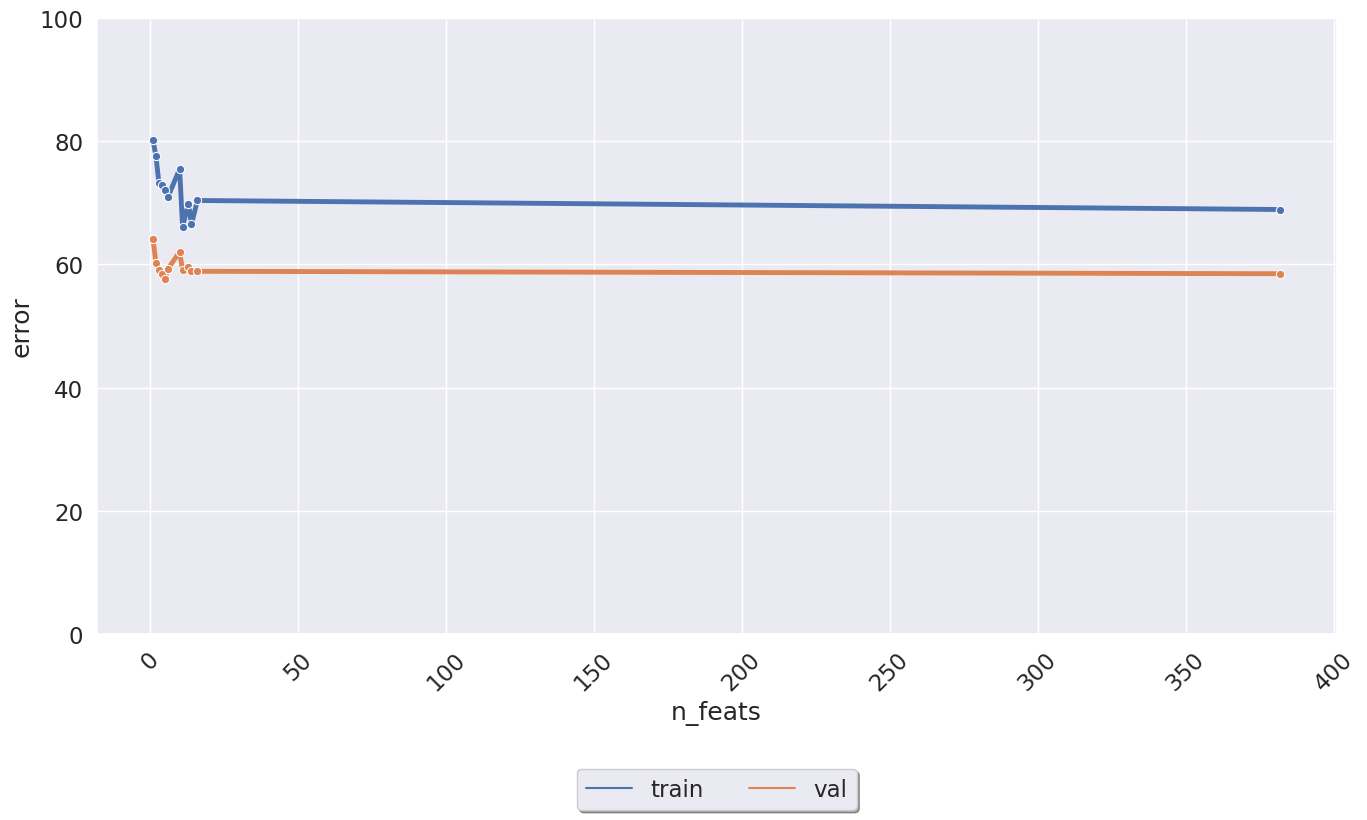

In [15]:
feature_selector.print_df(falling_result['final_df'])

In [16]:
falling_result['final_df']

,n_feats,error_train,error_val,drop_feats,l_detected_flag,l_suspicious_flag,l_suspicion_queue,l_max_val_error,l_falling_window_queue
0,382,68.91338,58.48700,"[X257, X262, X261, X260, X259, X247, X258, X250, X251, X248, X255, X249, X263, X254, X253, X252, X256, X266, X264, X265, X285, X284, X283, X282, X281, X280, X279, X278, X277, X276, X274, X273, X272, X271, X270, X269, X268, X267, X245, X246, X379, X244, X210, X219, X383, X217, X216, X215, X214, X213, X212, X211, X209, X221, X208, X207, X206, X205, X204, X384, X203, X202, X201, X220, X222, X243, X234, X287, X242, X241, X240, X239, X238, X237, X236, X235, X233, X223, X232, X231, X230, X229, X228, X227, X226, X225, X224, X286, X291, X288, X356, X354, X353, X352, X351, X350, X349, X348, X347, X346, ...]",False,False,[58.48699552296614],0.00000,[58.48699552296614]
1,16,70.37686,58.88101,"[X79, X163]",False,False,[58.88100706412327],0.00000,"[58.48699552296614, 58.88100706412327]"
2,14,66.48904,58.92909,[X96],False,False,[58.9290928314754],58.48700,"[58.48699552296614, 58.88100706412327, 58.9290928314754]"
3,13,69.87955,59.62164,"[X377, X71]",False,False,[59.621643791119645],58.88101,"[58.88100706412327, 58.9290928314754, 59.621643791119645]"
4,11,66.12170,59.08293,[X329],False,False,[59.08292772336877],58.92909,"[58.9290928314754, 59.621643791119645, 59.08292772336877]"
5,10,75.48821,62.02117,"[X1, X6, X117, X8]",False,False,[62.02116905165526],59.62164,"[59.621643791119645, 59.08292772336877, 62.02116905165526]"
6,6,70.86309,59.25508,[X58],False,False,[59.2550845892676],59.62164,"[59.08292772336877, 62.02116905165526, 59.2550845892676]"
7,5,72.12493,57.70398,[X321],False,False,[57.703978362450194],62.02117,"[62.02116905165526, 59.2550845892676, 57.703978362450194]"
8,4,72.91065,58.48570,[X275],True,True,[58.48570316982676],62.02117,"[59.2550845892676, 57.703978362450194]"
9,3,73.21369,59.02900,[X5],True,True,"[58.48570316982676, 59.02900251184873]",62.02117,"[59.2550845892676, 57.703978362450194]"


In [17]:
feature_selector.get_best_features_before_n_feats(falling_result['final_df'], features_num=50)

{'num_feats_by_min': 5, 'features_list': ['X0', 'X218', 'X5', 'X275', 'X321']}

In [19]:
feats = feature_selector.get_best_features_before_n_feats(falling_result['final_df'], features_num=50)['features_list'] \
        if 'falling_result' in locals() else X_train.columns.to_list()

## train model

In [20]:
X_train, X_val, X_test = X_train[feats], X_val[feats], X_test[feats]

In [21]:
model = get_model.get_model_with_optuna(
    X_train, y_train,
    X_val, y_val,
    feats, **hp_with_optuna)

  0%|          | 0/200 [00:00<?, ?it/s]

In [22]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'gain',
 'learning_rate': 0.010768555875778317,
 'max_depth': 3,
 'min_child_samples': 20,
 'min_child_weight': 0.4140406556621095,
 'min_split_gain': 0.799993876869284,
 'n_estimators': 500,
 'n_jobs': 8,
 'num_leaves': 69,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 17.99806501248869,
 'reg_lambda': 19.018208874272126,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': -1,
 'early_stopping_round': 10,
 'extra_trees': False,
 'path_smooth': 0.5809724781673367,
 'max_bin': 11}

In [23]:
mean_squared_error(y_test, model.predict(X_test))  # not good

76.2424205105341

In [24]:
df_test[target_col] = model.predict(df_test[feats])
df_test = df_test[['ID', target_col]]

In [25]:
df_test.set_index('ID').to_csv('test.csv')

## trial with catboost

In [59]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [60]:
## catboost with all features and default hepyrparameters
from catboost import CatBoostRegressor, FeaturesData, Pool

object_columns = df_train.select_dtypes(include='object').columns
numeric_columns = [col for col in df_train.columns if col not in object_columns]
numeric_columns.remove('ID')
numeric_columns.remove(target_col)

X_train, X_val, y_train, y_val = train_test_split(
    df_train.drop(target_col, axis=1), df_train[target_col],
    test_size=0.15, random_state=43,
)

train_pool = Pool(data=FeaturesData(num_feature_data=np.float32(X_train[numeric_columns].values),
                                    cat_feature_data=X_train[object_columns].astype(str).values),
                          label=y_train.values.astype(float))

val_pool = Pool(data=FeaturesData(num_feature_data=np.float32(X_val[numeric_columns].values),
                                  cat_feature_data=X_val[object_columns].astype(str).values),
                          label=y_val.values.astype(float))

catbooster = CatBoostRegressor()
catbooster.fit(train_pool, eval_set=val_pool, silent=True, plot=False)

In [61]:
test_pool = Pool(data=FeaturesData(num_feature_data=np.float32(df_test[numeric_columns].values),
                                   cat_feature_data=df_test[object_columns].astype(str).values))

df_test[target_col] = catbooster.predict(test_pool)
df_test = df_test[['ID', target_col]]

In [62]:
df_test.set_index('ID').to_csv('test.csv')  # better

# with H20

In [29]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
train = h2o.import_file('./data/train.csv')

target_col = 'y'
feats = [col for col in train.columns if col not in ('ID', target_col)]

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,47 mins 31 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_zendro_vkte4g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.740 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
%%time
aml = H2OAutoML(max_models=50, seed=1)
aml.train(x=feats, y=target_col, training_frame=train)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |
15:24:45.302: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]

█
15:24:49.452: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]

███
15:24:54.798: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]

█
15:25:05.45: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]

█
15:25:07.264: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]

████
15:27:09.484: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]


15:27:18.142: _train param, Dropping bad and constant columns: [X297, X330, X233, X93, X289, X235, X268, X347, X107, X11, X290, X293]

█
15:27:28.953: _trai

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9d5b49a495e7305bd19def66b4c345b6> was cancelled by the user.

In [56]:
best_h2o_model = aml.get_best_model()
test = h2o.import_file('./data/test.csv')
df_test = pd.read_csv('./data/test.csv')

df_test[target_col] = best_h2o_model.predict(test).as_data_frame()['predict']

df_test = df_test[['ID', target_col]]
df_test.set_index('ID').to_csv('test.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# with PyCaret

In [1]:
import pandas as pd
from pycaret.regression import setup, compare_models, evaluate_model, predict_model
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

target_col = 'y'

exp_name = setup(df_train, target=target_col, fold_shuffle=True, session_id=23)

best_model = compare_models()

evaluate_model(best_model)

df_test[target_col] = predict_model(best_model, data=df_test)['prediction_label']

df_test = df_test[['ID', target_col]]
df_test.set_index('ID').to_csv('test.csv')

,Description,Value
0,Session id,23
1,Target,y
2,Target type,Regression
3,Original data shape,"(4209, 378)"
4,Transformed data shape,"(4209, 422)"
5,Transformed train set shape,"(2946, 422)"
6,Transformed test set shape,"(1263, 422)"
7,Numeric features,369
8,Categorical features,8
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5.3718,74.1135,8.4689,0.5708,0.0747,0.0509,0.4780
catboost,CatBoost Regressor,5.4750,75.0094,8.5195,0.5648,0.0755,0.0520,5.7740
omp,Orthogonal Matching Pursuit,5.5672,75.7212,8.5590,0.5616,0.0760,0.0529,0.1240
br,Bayesian Ridge,5.5908,76.5096,8.6017,0.5571,0.0763,0.0531,0.2030
en,Elastic Net,5.6655,78.1609,8.6940,0.5477,0.0771,0.0538,0.1360
lasso,Lasso Regression,5.6659,78.2357,8.6971,0.5475,0.0771,0.0538,0.2030
llar,Lasso Least Angle Regression,5.6659,78.2357,8.6971,0.5475,0.0771,0.0538,0.1240
lightgbm,Light Gradient Boosting Machine,5.6436,78.2401,8.7126,0.5453,0.0774,0.0536,0.1800
ridge,Ridge Regression,5.7141,78.8749,8.7491,0.5421,0.0779,0.0543,0.1420
huber,Huber Regressor,5.2503,80.9482,8.8495,0.5317,0.0782,0.0487,0.4320


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# with THOT

In [2]:
import pandas as pd
from tpot import TPOTRegressor
import category_encoders
from sklearn.pipeline import Pipeline, FunctionTransformer

df_train = pd.read_csv('./data/train.csv')

target_col = 'y'
feats = [col for col in df_train.columns if col not in ('ID', target_col)]

X = df_train[feats]
y = df_train[target_col]

In [3]:
# it doesn't work with category encoder. What is the Automl which doesn't handle with cat ???
def X4_encoder_func(df):
    df['X4'] = df['X4'].apply(lambda x: 1 if x == 'd' else 0)
    return df

preproc_pipe = Pipeline(
    [
        ('X4_encoder', FunctionTransformer(X4_encoder_func)),
        ('X3_encoder', category_encoders.OneHotEncoder(cols=['X3'])),
        ('others_encoder', category_encoders.CatBoostEncoder(cols=['X0', 'X1', 'X2', 'X5', 'X6', 'X8'],
                                                             random_state=42))
    ]
)

preproc_pipe.fit(X, y=y)
X = preproc_pipe.transform(X)

/tmp/ipykernel_6695/3698611359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X4'] = df['X4'].apply(lambda x: 1 if x == 'd' else 0)
/tmp/ipykernel_6695/3698611359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X4'] = df['X4'].apply(lambda x: 1 if x == 'd' else 0)


In [4]:
tpot_model = TPOTRegressor(max_time_mins=60, cv=5, random_state=1, n_jobs=-1)
tpot_model.fit(X, y)

/home/zendro/anaconda3/envs/for_automl2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/zendro/anaconda3/envs/for_automl2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/zendro/anaconda3/envs/for_automl2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/zendro/anaconda3/envs/for_automl2/lib/python3.8/site-packages/tpot/builtins/__init

TPOTRegressor(max_time_mins=60, n_jobs=-1, random_state=1)

In [10]:
df_test = pd.read_csv('./data/test.csv').set_index('ID')
df_test = preproc_pipe.transform(df_test)

df_test[target_col] = tpot_model.predict(df_test)

df_test = df_test[[target_col]]
df_test.to_csv('test.csv')

/home/zendro/anaconda3/envs/for_automl2/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/home/zendro/anaconda3/envs/for_automl2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


# Conclusion

H2O shows score - 0.554 in competition
TPOT = 0.556